In [2]:
# conventional way to import pandas
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer
import pylab as pl
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# DF TO EXCEL
from pandas import ExcelWriter
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from pandas import ExcelWriter

In [3]:
# read CSV file from the 'data' subdirectory using a relative path
Dataset= pd.read_csv('C:\\Users\\Admin\\Desktop\\CS3123\\Data_Set\\Dataset.csv')

# display the first 5 rows
Dataset.head()

,0,0.1,1,2,3,4,5,6,7,8,...,436,437,438,439,440,441,442,443,444,445
0,1.204940e+12,1,79,1.0,4597,73.0,164.0,NaN,-1,-1,...,-1.0,-1.0,-1.0,20.0,NaN,1.0,40.0,-1.0,-1.0,-1.0
1,1.407940e+12,2,76,0.0,4595,74.0,172.0,NaN,1,-1,...,-1.0,-1.0,-1.0,20.0,NaN,1.0,55.0,-1.0,-1.0,-1.0
2,2.112950e+12,3,72,1.0,4602,NaN,NaN,NaN,1,1,...,-1.0,-1.0,-1.0,NaN,NaN,1.0,72.0,-1.0,-1.0,-1.0
3,4.129550e+11,4,63,1.0,4600,75.0,168.0,NaN,-1,-1,...,-1.0,-1.0,-1.0,20.0,NaN,1.0,55.0,-1.0,-1.0,-1.0
4,2.307940e+12,5,80,0.0,4679,85.0,187.0,NaN,-1,-1,...,-1.0,-1.0,-1.0,NaN,NaN,1.0,27.0,-1.0,-1.0,-1.0


In [4]:
# Drop index and unnessery featuer 
Dataset.drop(['0', '0.1','3'], axis=1,inplace=True)

In [5]:
#Drop all features except (Age - gender -Height -weight)
subset=Dataset.drop(Dataset.columns.to_series()["6":"445"], axis=1)

In [6]:
subset.shape

(2772, 4)

In [7]:
#Missing da


In [8]:
import numpy as np

# Drop sample that has missing value in Gender feater 
H_Data=subset.drop(subset.index[1319])

H_Data.shape

(2771, 4)

In [9]:
#removing outliers
H_Data = H_Data[(H_Data['1']> 0)]
H_Data= H_Data[(H_Data['1']<100)]



In [10]:
H_Data.shape

(2759, 4)

In [11]:
#Removing outliers from Hight
Data = H_Data[(H_Data['5']> 145)]
Data = H_Data[(H_Data['5']<195)]

# Visualizing data using seaborn

**Seaborn:** Python library for statistical data visualization built on top of Matplotlib

In [12]:
Data.shape

(2340, 4)

In [13]:
#Removing outliers from Weight
Data = Data[(Data['4']> 38)]
Data = Data[(Data['4']<250)]

In [14]:
Data.shape

(2334, 4)

In [15]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

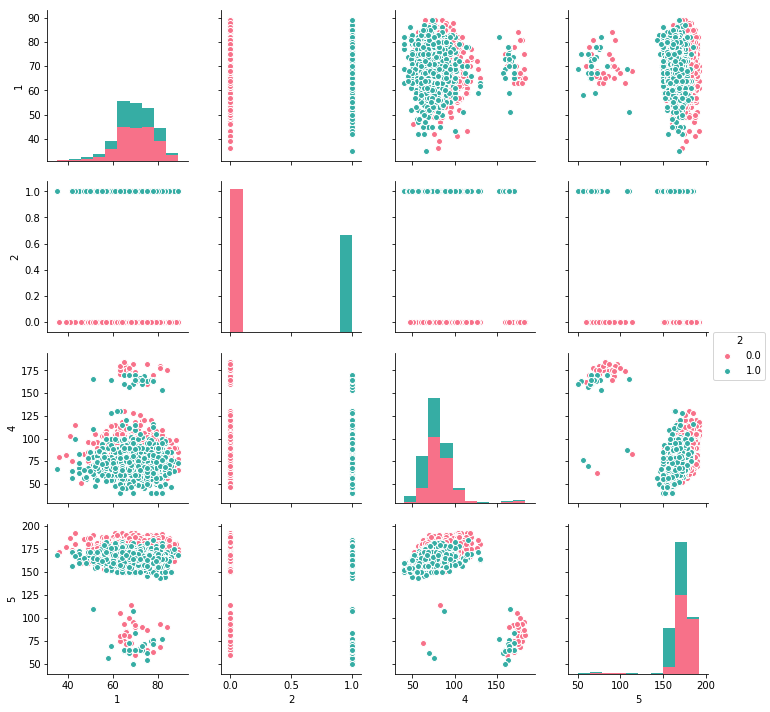

In [16]:
sns.pairplot(Data,  hue="2",palette="husl")

# Normalize data

In [28]:
Data

,1,2,4,5
0,79,1.0,73.0,164.0
1,76,0.0,74.0,172.0
3,63,1.0,75.0,168.0
4,80,0.0,85.0,187.0
5,71,0.0,78.0,165.0
6,82,0.0,94.0,175.0
7,65,1.0,87.0,165.0
8,81,0.0,79.0,167.0
9,72,0.0,78.0,173.0
10,74,1.0,70.0,165.0


In [29]:
import pandas as pd
from sklearn import preprocessing

df = pd.DataFrame(Data)
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df)
df_normalized = pd.DataFrame(np_scaled)


In [34]:
print(df_normalized)

             0    1         2         3
0     0.814815  1.0  0.229167  0.802817
1     0.759259  0.0  0.236111  0.859155
2     0.518519  1.0  0.243056  0.830986
3     0.833333  0.0  0.312500  0.964789
4     0.666667  0.0  0.263889  0.809859
5     0.870370  0.0  0.375000  0.880282
6     0.555556  1.0  0.326389  0.809859
7     0.851852  0.0  0.270833  0.823944
8     0.685185  0.0  0.263889  0.866197
9     0.722222  1.0  0.208333  0.809859
10    0.407407  0.0  0.347222  0.880282
11    0.555556  0.0  0.277778  0.873239
12    0.870370  0.0  0.173611  0.809859
13    0.592593  0.0  0.375000  0.845070
14    0.574074  0.0  0.277778  0.880282
15    0.629630  1.0  0.256944  0.753521
16    0.648148  0.0  0.451389  1.000000
17    0.555556  1.0  0.173611  0.802817
18    0.296296  0.0  0.152778  0.788732
19    0.870370  1.0  0.152778  0.809859
20    0.870370  0.0  0.298611  0.915493
21    0.777778  0.0  0.208333  0.802817
22    1.000000  0.0  0.173611  0.880282
23    0.759259  0.0  0.243056  0.929577


In [39]:
print(df_normalized[1])

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
5       0.0
6       1.0
7       0.0
8       0.0
9       1.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      1.0
16      0.0
17      1.0
18      0.0
19      1.0
20      0.0
21      0.0
22      0.0
23      0.0
24      1.0
25      0.0
26      1.0
27      0.0
28      0.0
29      1.0
       ... 
2304    0.0
2305    0.0
2306    1.0
2307    0.0
2308    1.0
2309    1.0
2310    0.0
2311    1.0
2312    0.0
2313    0.0
2314    0.0
2315    0.0
2316    0.0
2317    1.0
2318    1.0
2319    1.0
2320    1.0
2321    1.0
2322    0.0
2323    1.0
2324    1.0
2325    1.0
2326    0.0
2327    1.0
2328    0.0
2329    1.0
2330    0.0
2331    0.0
2332    0.0
2333    0.0
Name: 1, Length: 2334, dtype: float64


In [40]:
# Female subset
F_Data=df_normalized[df_normalized[1] == 0.0]
#Male subset
M_Data=df_normalized[df_normalized[1] == 1.0]

In [41]:
F_Data.shape

(1391, 4)

In [42]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(2334, 3)


In [43]:
M_Data.shape

(943, 4)

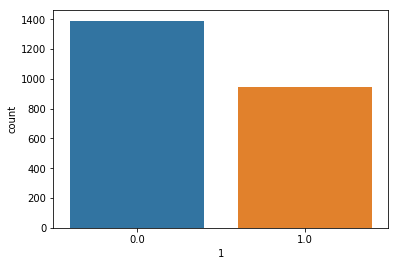

In [115]:
sns.countplot(df_normalized[1],label="Gebder frequancy")
plt.show()

In [60]:
F_Data.sort_values(1, ascending = 'True')

,0,1,2,3
1,0.759259,0.0,0.236111,0.859155
1578,0.777778,0.0,0.243056,0.901408
1576,0.574074,0.0,0.291667,0.985915
1575,0.629630,0.0,0.277778,0.880282
1574,0.777778,0.0,0.326389,0.908451
1572,0.481481,0.0,0.256944,0.845070
1571,0.555556,0.0,0.201389,0.788732
1570,0.425926,0.0,0.243056,0.901408
1566,0.851852,0.0,0.256944,0.880282
1564,0.555556,0.0,0.368056,0.873239


In [80]:
BF_Data=F_Data.sample(943, random_state=0)

In [81]:
frames = [M_Data, BF_Data]

In [82]:
MF_Data = pd.concat(frames)

In [83]:
MF_Data.shape

(1886, 4)

In [86]:
MF_D= MF_Data[(MF_Data[1]> 0)]
MF_D =MF_Data[(MF_Data[1]<100)]


In [87]:
MF_D.shape

(1886, 4)

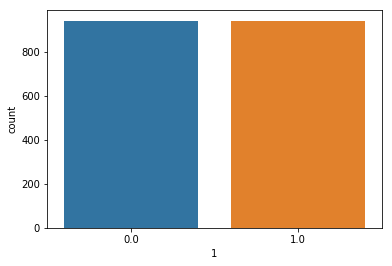

In [114]:
sns.countplot(MF_D[1],label="Gebder frequancy")
plt.show()

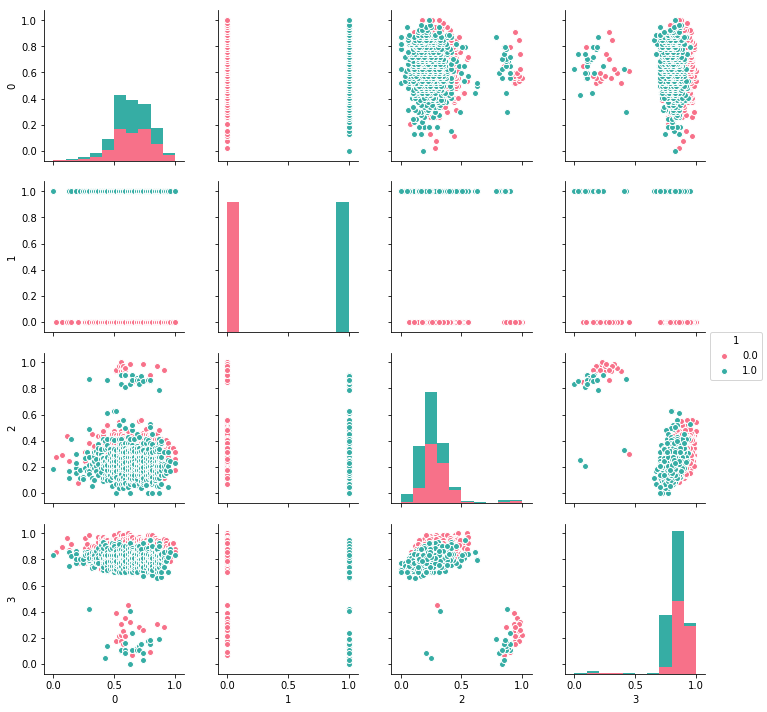

In [88]:
MF_Data=MF_Data.sort_values(0, ascending = 'True')
sns.pairplot(MF_Data,  hue=1,palette="husl")

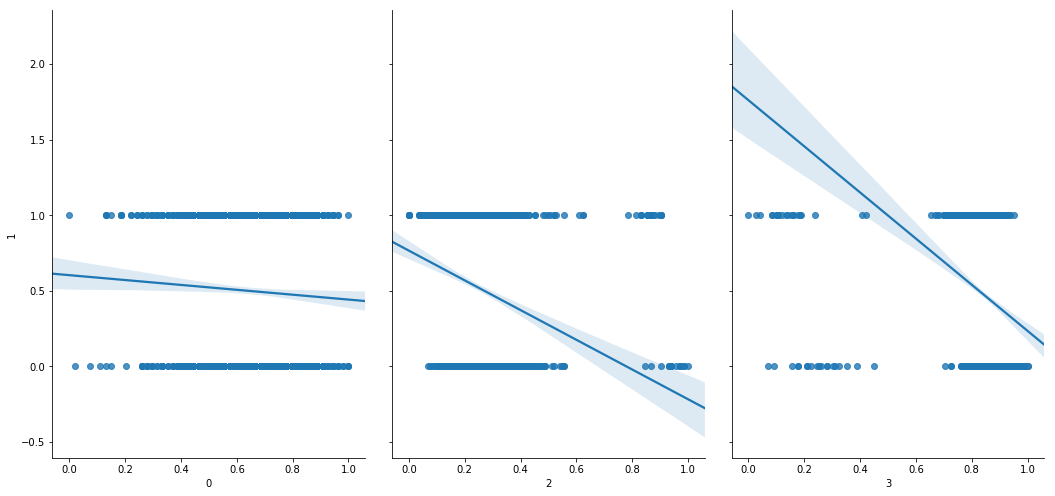

In [113]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(MF_Data, x_vars=[0,2,3], y_vars=1, size=7, aspect=0.7, kind='reg')

In [91]:
# select a Series from the DataFrame
y = MF_Data[1]
TT=MF_Data.drop([1],axis=1)
X=TT[:]
# print the first 5 values
y.shape


(1886,)

In [92]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(1886,)


In [93]:
# simulate splitting a dataset of 2334 observations into 5 folds
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False).split(range(2334))

# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, Data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, Data[0], str(Data[1])))

Iteration                   Training set observations                   Testing set observations
    1     [ 467  468  469 ... 2331 2332 2333] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 2

In [94]:
from sklearn.model_selection import cross_val_score
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.76842105 0.75789474 0.72105263 0.71276596 0.73404255 0.7287234
 0.70744681 0.71276596 0.73404255 0.70212766]


In [95]:
# use average accuracy as an estimate of out-of-sample accuracy
print('Accuracy of K-NN classifier on test set:',scores.mean())


Accuracy of K-NN classifier on test set: 0.7279283314669652


In [96]:
# search for an optimal value of K for KNN
k_range = list(range(1, 50))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)


[0.6733090705487121, 0.6796584546472564, 0.7051231802911533, 0.7093952967525196, 0.7279283314669652, 0.7337961926091825, 0.7517861142217246, 0.7459798432250839, 0.7550111982082867, 0.7502463605823068, 0.7555375139977604, 0.7491881298992162, 0.7534434490481522, 0.7507950727883539, 0.7534602463605824, 0.7561086226203807, 0.7571556550951847, 0.753454647256439, 0.761410974244121, 0.7550615901455766, 0.7608846584546474, 0.7614221724524077, 0.7656718924972005, 0.7640817469204927, 0.7651623740201567, 0.7619820828667413, 0.7667749160134377, 0.764652855543113, 0.771545352743561, 0.760414333706607, 0.7640985442329228, 0.7587905935050393, 0.7609070548712207, 0.7587905935050392, 0.7635666293393057, 0.7593281075027996, 0.7646304591265397, 0.7646192609182532, 0.7651399776035835, 0.7661982082866742, 0.7667413213885779, 0.7651623740201567, 0.7709910414333707, 0.7662094064949609, 0.7667301231802912, 0.7646080627099664, 0.7661982082866742, 0.7651343784994402, 0.7683090705487123]


Text(0,0.5,'Cross-Validated Accuracy')

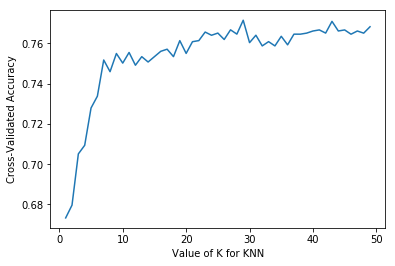

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [98]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=24)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.7640817469204927


In [99]:
#10-fold cross-validation with Decision Tree
DT = DecisionTreeClassifier()
scores = cross_val_score(DT, X, y, cv=10, scoring='accuracy')
print(scores)

[0.71578947 0.71578947 0.55789474 0.67021277 0.55319149 0.67553191
 0.68617021 0.64361702 0.71808511 0.75      ]


In [100]:
# use average accuracy as an estimate of out-of-sample accuracy
print('Accuracy of Decision Tree classifier on test set:',scores.mean())

Accuracy of Decision Tree classifier on test set: 0.6686282194848824


In [101]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print(scores)


[0.70526316 0.76315789 0.71578947 0.76595745 0.70212766 0.7393617
 0.7393617  0.7606383  0.77659574 0.74468085]


In [102]:
# use average accuracy as an estimate of out-of-sample accuracy
print('Accuracy of logistic regression classifier on test set:',scores.mean())

Accuracy of logistic regression classifier on test set: 0.7412933930571108


In [103]:
#10-fold cross-validation with Discriminant Analysis
lda = LinearDiscriminantAnalysis()
scores = cross_val_score(lda, X, y, cv=10, scoring='accuracy')
print(scores)

[0.72105263 0.76315789 0.71578947 0.7606383  0.70744681 0.7393617
 0.72340426 0.76595745 0.78723404 0.7393617 ]


In [104]:
# use average accuracy as an estimate of out-of-sample accuracy
print('Accuracy of LDA classifier on test set:',scores.mean())

Accuracy of LDA classifier on test set: 0.7423404255319149


In [105]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [106]:
# 10-fold cross-validation with all three features
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
print(scores)

[-0.20097592 -0.17253329 -0.20168408 -0.17647154 -0.17908989 -0.17869355
 -0.17068112 -0.16493049 -0.16047609 -0.16980606]


In [107]:
# fix the sign of MSE scores
mse_scores = -scores
print(mse_scores)

[0.20097592 0.17253329 0.20168408 0.17647154 0.17908989 0.17869355
 0.17068112 0.16493049 0.16047609 0.16980606]


In [108]:
# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[0.44830338 0.41537127 0.4490925  0.42008516 0.42319014 0.4227216
 0.41313571 0.40611636 0.40059467 0.41207531]


In [109]:
# calculate the average RMSE
print(rmse_scores.mean())

0.4210686083300395
